# <center> Customer Service Requests Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import klib as k
from datetime import datetime

# 1.1 Import the dataset

In [2]:
data=pd.read_csv('./311_Service_Requests_from_2010_to_Present.csv', parse_dates=['Created Date','Closed Date'])

In [3]:
data.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,2015-12-31 23:54:05,2016-01-01 01:42:54,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,2015-12-31 23:53:58,2016-01-01 08:27:32,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      358057 non-null  object        
 7   Location Type                   364425 non-null  object        
 8   Incident Zip                    361560 non-null  float64       
 9   Incident Address                312859 non-null  object        
 10  Street Name                     312859 non-null  object 

In [5]:
data.shape

(364558, 53)

In [6]:
data.size

19321574

In [7]:
data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [8]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [9]:
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [10]:
data.isnull().mean()*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.653120
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.783255
Location Type                       0.036483
Incident Zip                        0.822366
Incident Address                   14.181283
Street Name                        14.181283
Cross Street 1                     15.686941
Cross Street 2                     15.856187
Intersection Street 1              85.977540
Intersection Street 2              86.144317
Address Type                        0.892039
City                                0.822091
Landmark                           99.897136
Facility Type                       0.655314
Status                              0.000000
Due Date                            0.000823
Resolution Description              0.000000
Resolution

In [11]:
data.duplicated().sum()

0

<b>2.1 Draw a frequency plot to show the number of null values in each column of the DataFrame

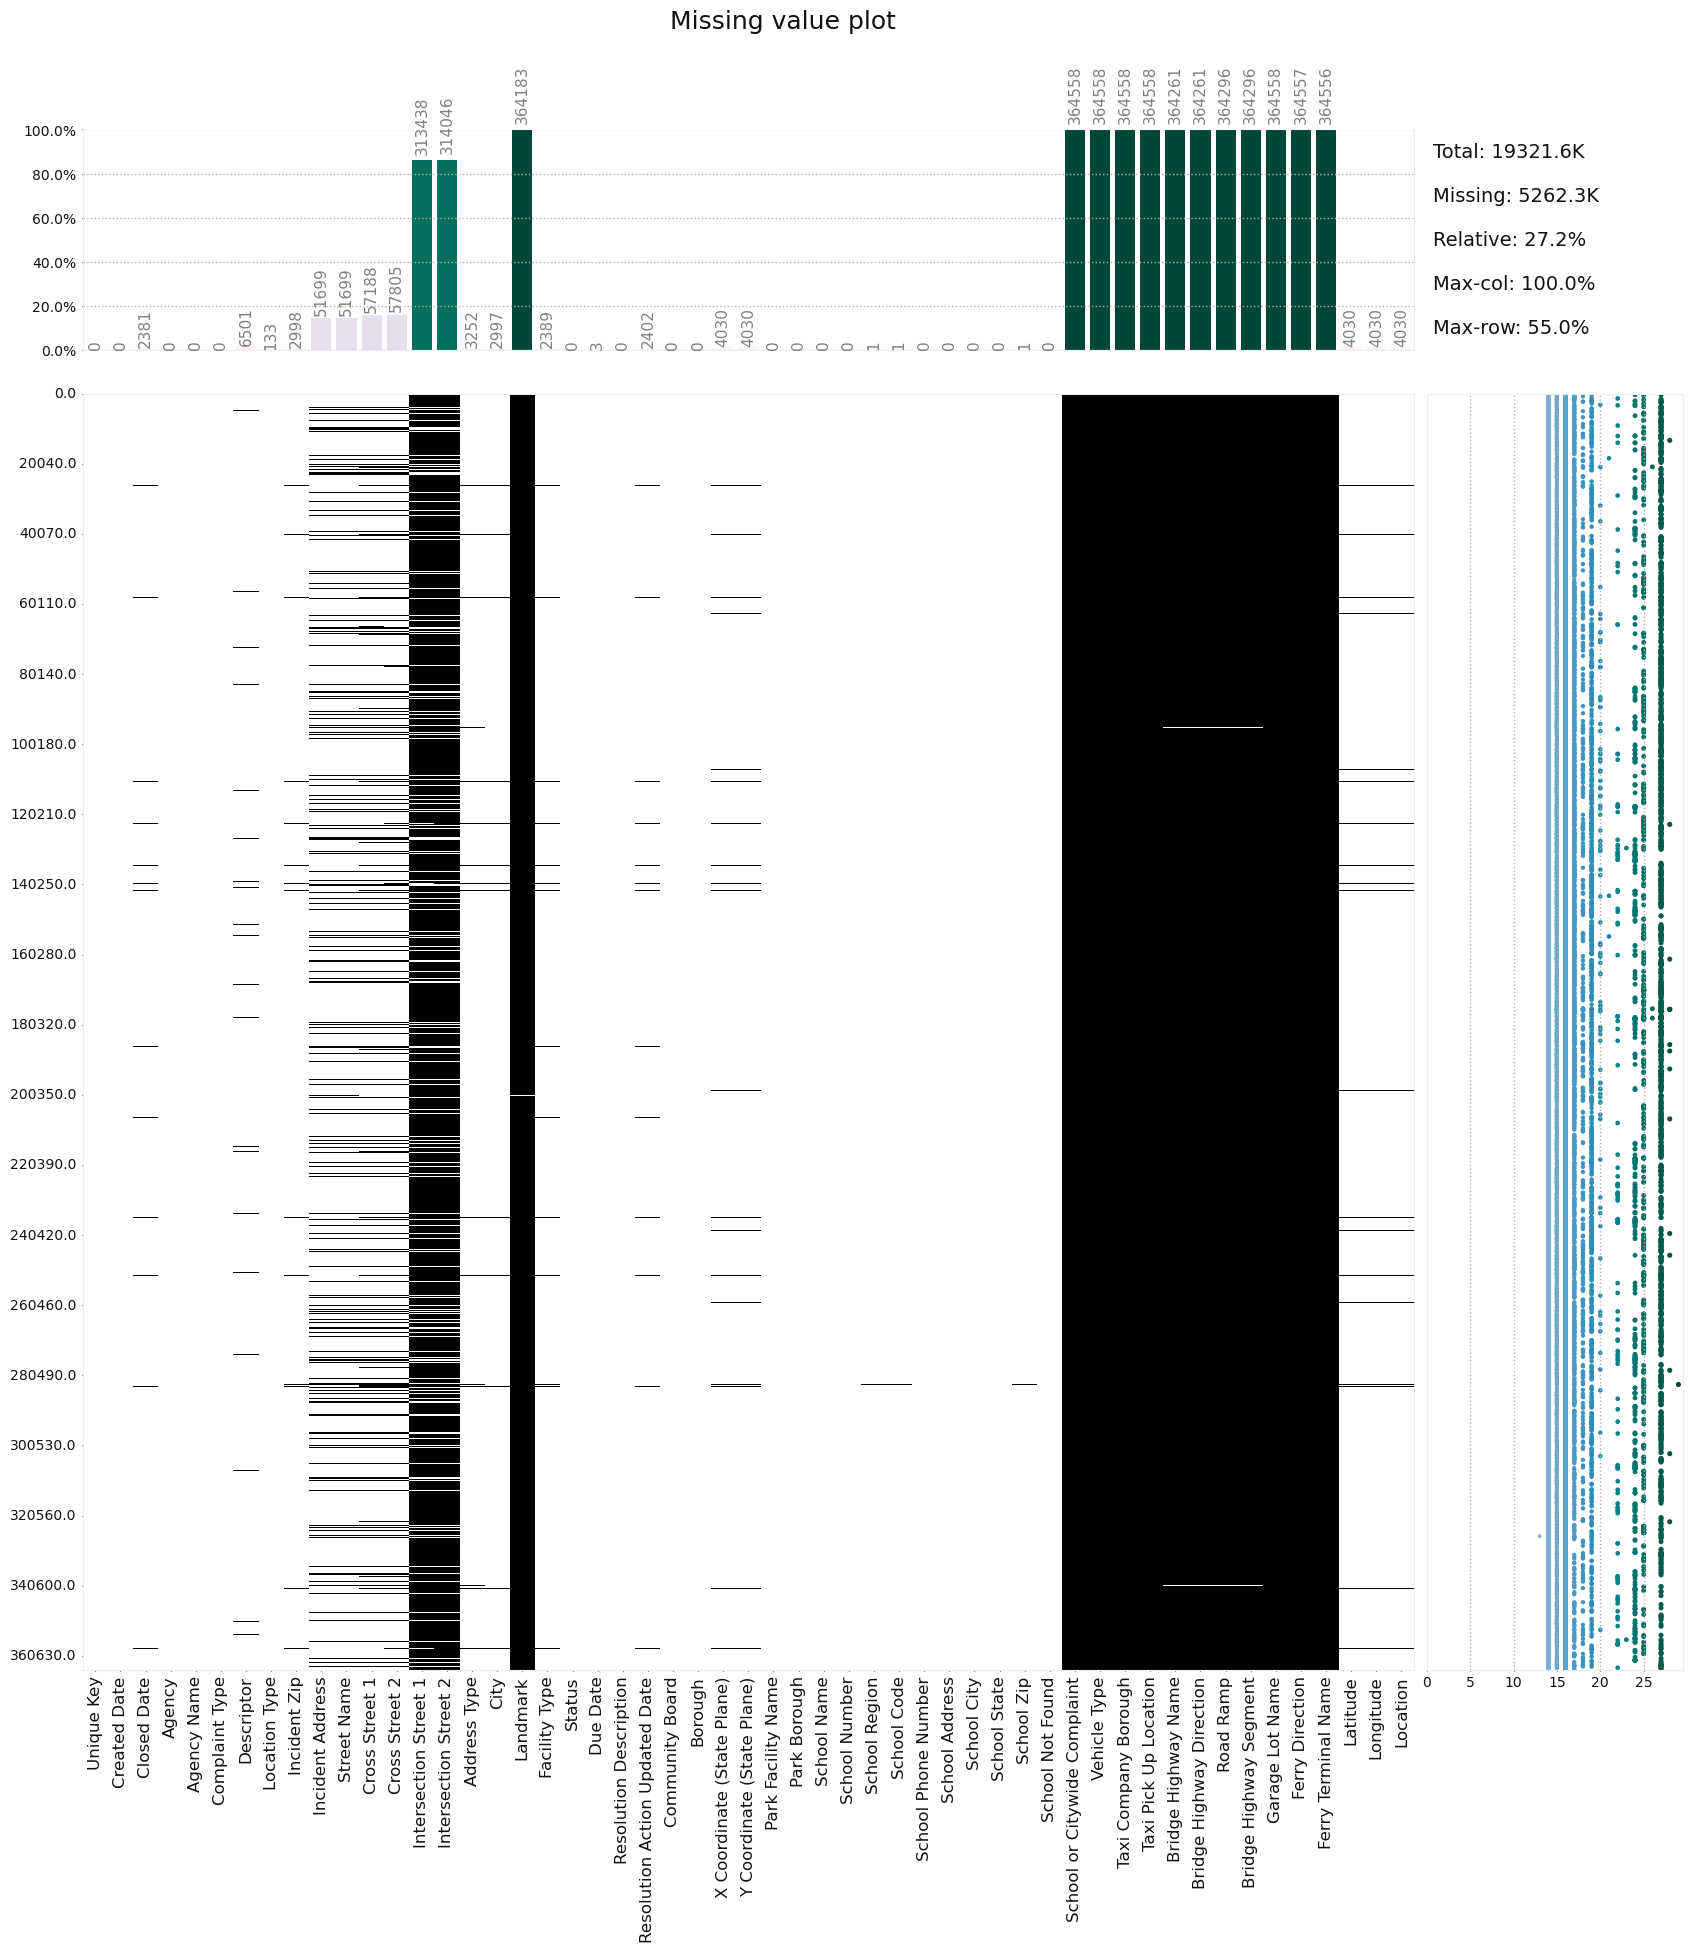

In [12]:
k.missingval_plot(data=data);

## 2.2 Missing value treatment

### 2.2.1 Remove the records whose Closed Date values are null

In [13]:
data.dropna(subset=['Closed Date'],inplace=True)


In [14]:
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                            0
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6496
Location Type                        130
Incident Zip                         675
Incident Address                   51686
Street Name                        51686
Cross Street 1                     55331
Cross Street 2                     55464
Intersection Street 1             311549
Intersection Street 2             311673
Address Type                         929
City                                 674
Landmark                          361802
Facility Type                         18
Status                                 0
Due Date                               1
Resolution Description                 0
Resolution Action Updated Date        39
Community Board                        0
Borough         

## 2.3 Analyze the date column, and remove entries that have an incorrect timeline

### 2.3.1 Calculate the time elapsed in closed and creation date

In [15]:
data['elapsed'] =  data['Closed Date'] - data['Created Date']
data['elapsed']

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Name: elapsed, Length: 362177, dtype: timedelta64[ns]

### 2.3.2 Convert the calculated date to seconds to get a better representation

In [16]:
data['elapsed']= data['elapsed'].dt.total_seconds()

### 2.3.3 View the descriptive statistics for the newly created column

In [17]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,elapsed
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0


In [18]:
data.elapsed[0:10]

0     3330.0
1     5233.0
2    17494.0
3    27927.0
4    12464.0
5     6821.0
6     7102.0
7     6529.0
8    30814.0
9     5022.0
Name: elapsed, dtype: float64

### 2.3.4 Check the number of null values in the Complaint_Type and City columns

In [19]:
data.rename(columns={'Complaint Type':'Complaint_Type'},inplace=True)

In [20]:
data.City.value_counts()

BROOKLYN               118849
NEW YORK                77289
BRONX                   49166
STATEN ISLAND           15335
JAMAICA                  8930
ASTORIA                  7991
FLUSHING                 7486
RIDGEWOOD                6391
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3557
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3117
WOODHAVEN                3102
LONG ISLAND CITY         3027
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2333
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2105
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

In [21]:
data['City'].isna().sum()

674

In [22]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint_Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [23]:
data.Complaint_Type.isna().sum()

0

### 2.3.5 Impute the NA value with Unknown City

In [24]:
data['City'].fillna("Unknown City", inplace=True)

In [25]:
data.City

0                 NEW YORK
1                  ASTORIA
2                    BRONX
3                    BRONX
4                 ELMHURST
                ...       
364553           WOODHAVEN
364554               BRONX
364555            NEW YORK
364556               BRONX
364557    SOUTH OZONE PARK
Name: City, Length: 362177, dtype: object

In [26]:
data.City.values

array(['NEW YORK', 'ASTORIA', 'BRONX', ..., 'NEW YORK', 'BRONX',
       'SOUTH OZONE PARK'], dtype=object)

### 2.3.6 Draw a frequency plot for the complaints in each city

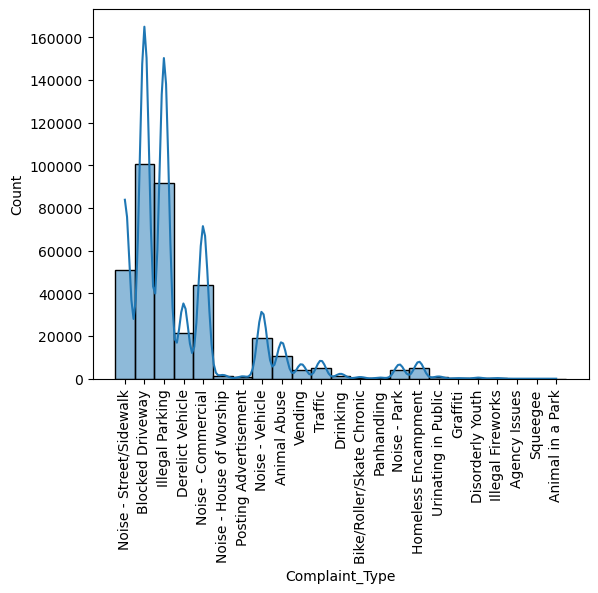

In [27]:
sns.histplot(data=data.City, x=data['Complaint_Type'],kde=True)
plt.xticks(rotation=90)
plt.show()

### 2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

In [28]:
City_brooklyn=data.query("City=='BROOKLYN'")

In [29]:
City_brooklyn

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint_Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,elapsed
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",6821.0
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",5022.0
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)",30649.0
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",3078.0
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",10589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364539,29608505,2015-01-01 00:23:55,2015-01-01 02:58:38,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11201.0,229 DUFFIELD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.691248,-73.984375,"(40.69124772858873, -73.98437529459297)",9283.0
364541,29612697,2015-01-01 00:19:22,2015-01-01 02:41:10,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11211.0,27 HOPE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.713613,-73.956966,"(40.71361332917013, -73.95696623841229)",8508.0
364544,29613295,2015-01-01 00:17:48,2015-01-01 03:24:48,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11217.0,242 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.680352,-73.974766,"(40.68035202521423, -73.97476587888686)",11220.0
364545,29613456,2015-01-01 00:17:47,2015-01-01 00:51:13,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11237.0,1373 DECATUR STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.692384,-73.904011,"(40.692383519190834, -73.90401080101479)",2006.0


In [30]:
x=City_brooklyn[['Complaint_Type']].value_counts()

In [31]:
x

Complaint_Type           
Blocked Driveway             36445
Illegal Parking              33532
Noise - Street/Sidewalk      13982
Noise - Commercial           13855
Derelict Vehicle              6257
Noise - Vehicle               5965
Animal Abuse                  3191
Noise - Park                  1575
Traffic                       1258
Homeless Encampment            948
Vending                        575
Noise - House of Worship       389
Drinking                       291
Urinating in Public            155
Bike/Roller/Skate Chronic      124
Disorderly Youth                79
Illegal Fireworks               61
Graffiti                        60
Posting Advertisement           58
Panhandling                     49
dtype: int64

In [32]:
val=x.values

In [33]:
val

array([36445, 33532, 13982, 13855,  6257,  5965,  3191,  1575,  1258,
         948,   575,   389,   291,   155,   124,    79,    61,    60,
          58,    49], dtype=int64)

In [34]:
brook_complaint = City_brooklyn.Complaint_Type.value_counts()
brook_complaint

Blocked Driveway             36445
Illegal Parking              33532
Noise - Street/Sidewalk      13982
Noise - Commercial           13855
Derelict Vehicle              6257
Noise - Vehicle               5965
Animal Abuse                  3191
Noise - Park                  1575
Traffic                       1258
Homeless Encampment            948
Vending                        575
Noise - House of Worship       389
Drinking                       291
Urinating in Public            155
Bike/Roller/Skate Chronic      124
Disorderly Youth                79
Illegal Fireworks               61
Graffiti                        60
Posting Advertisement           58
Panhandling                     49
Name: Complaint_Type, dtype: int64

##  Scatter plot

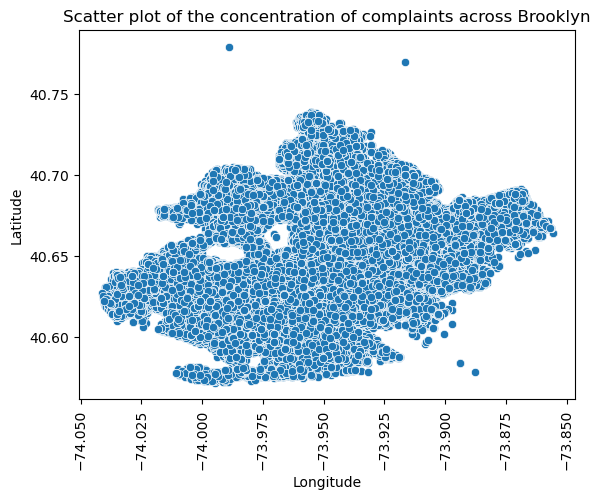

In [69]:
sns.scatterplot(data=City_brooklyn, y='Latitude', x='Longitude')
plt.xticks(rotation=90)
plt.title("Scatter plot of the concentration of complaints across Brooklyn")
plt.show()

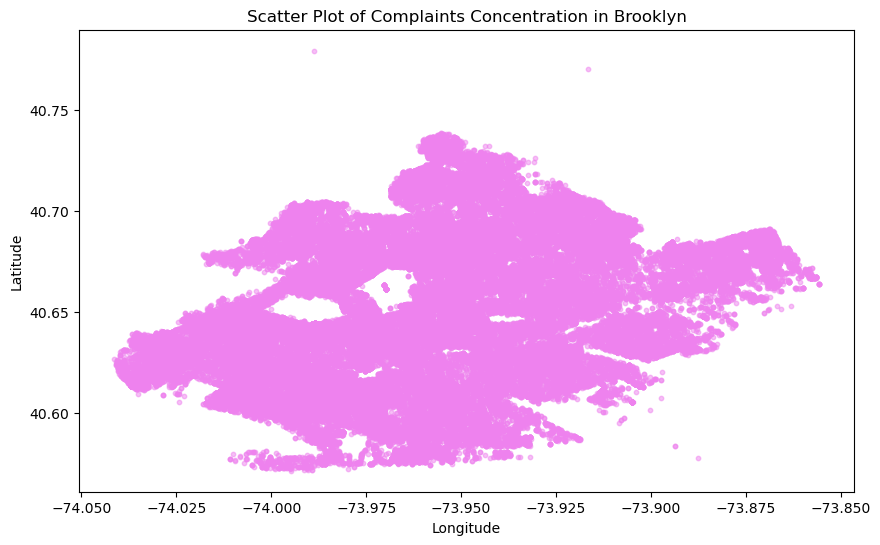

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(City_brooklyn['Longitude'], City_brooklyn['Latitude'], alpha=0.5, s=10, color='violet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Complaints Concentration in Brooklyn')
plt.show()

## Hexbin Plot

In [37]:
brook = City_brooklyn[['Complaint_Type','Longitude']].copy()

In [38]:
column=np.random.randint(0,100, size=len(brook))

In [39]:
val=brook.Complaint_Type.value_counts().values
val

array([36445, 33532, 13982, 13855,  6257,  5965,  3191,  1575,  1258,
         948,   575,   389,   291,   155,   124,    79,    61,    60,
          58,    49], dtype=int64)

In [40]:
brook.insert(2,'column',column)

In [41]:
brook.head()

,Complaint_Type,Longitude,column
5,Illegal Parking,-73.992568,76
9,Blocked Driveway,-73.999539,32
13,Illegal Parking,-73.874505,4
17,Noise - Commercial,-73.983430,98
18,Noise - Commercial,-73.930202,20


In [42]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint_Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [43]:
City_brooklyn.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint_Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

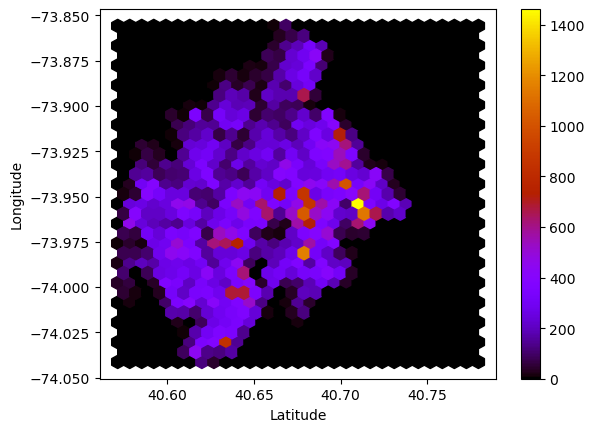

In [44]:
City_brooklyn.plot.hexbin('Latitude','Longitude',gridsize=30,cmap='gnuplot');

In [45]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint_Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [46]:
data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint_Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,elapsed
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",37067.0
364554,29608392,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",8434.0
364555,29607589,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",1143.0
364556,29610889,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",9653.0


In [47]:
#y=data.Complaint_Type.mean()

In [48]:
#y

### 3. Find major types of complaints:


### 3.1 Plot a bar graph to show the types of complaints

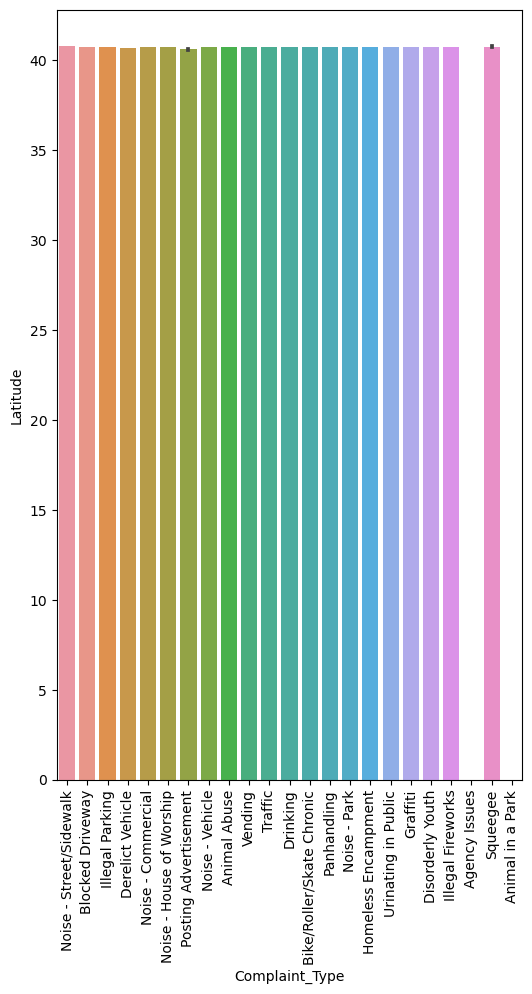

In [49]:
plt.figure(figsize=(6,10))
plt.xticks(rotation = 90)
sns.barplot(data=data, x='Complaint_Type', y='Latitude')
plt.show()

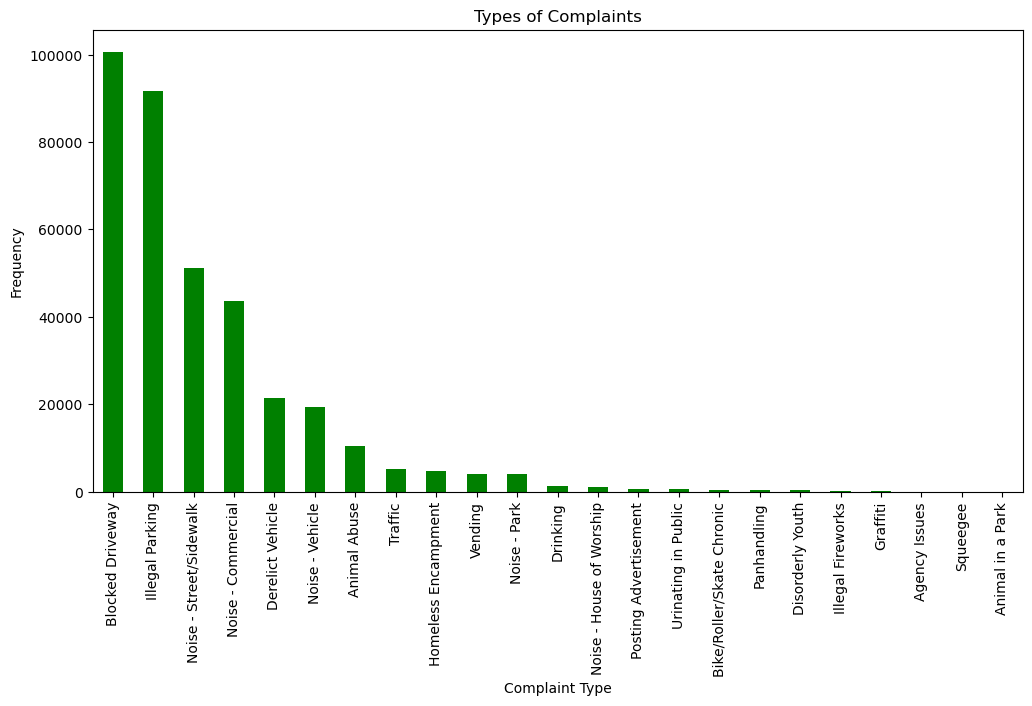

In [71]:
complaints_by_type = data['Complaint_Type'].value_counts()
plt.figure(figsize=(12, 6))
complaints_by_type.plot(kind='bar', color='green')
plt.xlabel('Complaint Type')
plt.ylabel('Frequency')
plt.title('Types of Complaints')
plt.xticks(rotation=90)
plt.show()

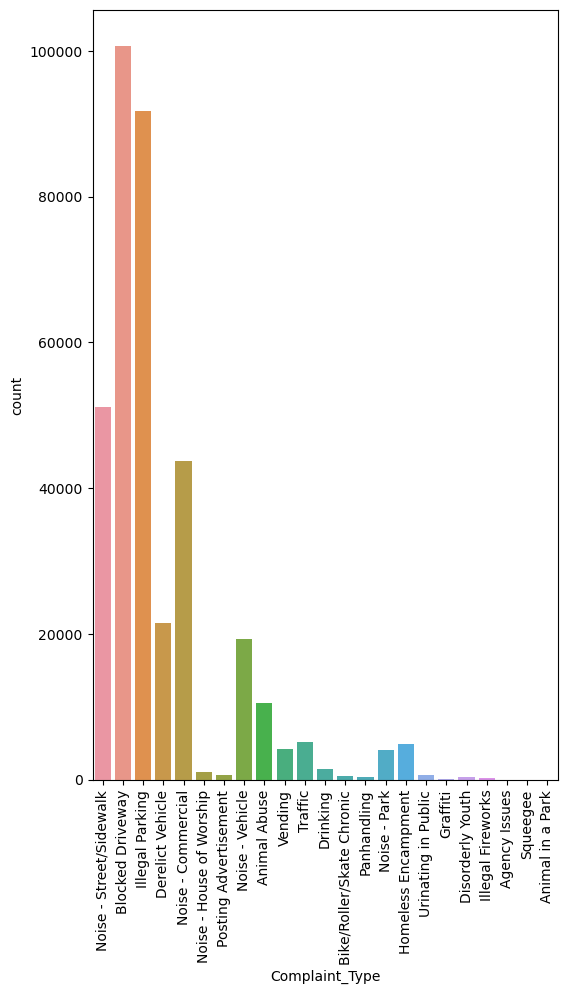

In [50]:
plt.figure(figsize=(6,10))
plt.xticks(rotation = 90)
sns.countplot(data=data, x='Complaint_Type')
plt.show()

### 3.2 Check the frequency of various types of complaints for New York City

In [51]:
data.City.value_counts()

BROOKLYN               118849
NEW YORK                77289
BRONX                   49166
STATEN ISLAND           15335
JAMAICA                  8930
ASTORIA                  7991
FLUSHING                 7486
RIDGEWOOD                6391
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3557
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3117
WOODHAVEN                3102
LONG ISLAND CITY         3027
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2333
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2105
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

In [52]:
newyork_complaint = data.query("City=='NEW YORK'")

In [53]:
newyork_complaint.Complaint_Type.value_counts()

Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint_Type, dtype: int64

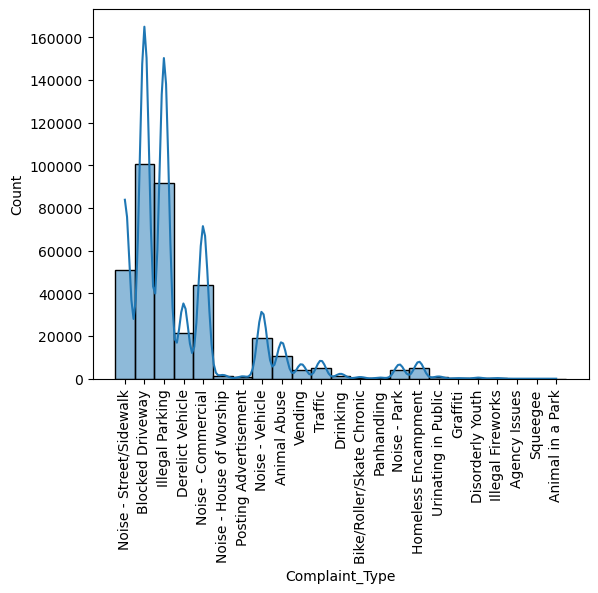

In [54]:
sns.histplot(data=newyork_complaint, x=data['Complaint_Type'], kde=True)
plt.xticks(rotation=90)
plt.show()

### 3.3 Find the top 10 complaint types

In [55]:
top_10_complaints = data.Complaint_Type.value_counts()

In [56]:
top_10_complaints

Blocked Driveway             100624
Illegal Parking               91716
Noise - Street/Sidewalk       51139
Noise - Commercial            43751
Derelict Vehicle              21518
Noise - Vehicle               19301
Animal Abuse                  10530
Traffic                        5196
Homeless Encampment            4879
Vending                        4185
Noise - Park                   4089
Drinking                       1404
Noise - House of Worship       1068
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       475
Panhandling                     325
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Animal in a Park                  1
Name: Complaint_Type, dtype: int64

In [57]:
print("Top 10 Complaints:\n",top_10_complaints.nlargest(10))

Top 10 Complaints:
 Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint_Type, dtype: int64


### 3.4 Display the various types of complaints in each city

In [58]:
data.loc[:,['City','Complaint_Type']]

,City,Complaint_Type
0,NEW YORK,Noise - Street/Sidewalk
1,ASTORIA,Blocked Driveway
2,BRONX,Blocked Driveway
3,BRONX,Illegal Parking
4,ELMHURST,Illegal Parking
...,...,...
364553,WOODHAVEN,Illegal Parking
364554,BRONX,Noise - Vehicle
364555,NEW YORK,Noise - Street/Sidewalk
364556,BRONX,Blocked Driveway


### 3.5 Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

In [59]:
df_new = data[['City','Complaint_Type']].copy()

In [60]:
df_new

,City,Complaint_Type
0,NEW YORK,Noise - Street/Sidewalk
1,ASTORIA,Blocked Driveway
2,BRONX,Blocked Driveway
3,BRONX,Illegal Parking
4,ELMHURST,Illegal Parking
...,...,...
364553,WOODHAVEN,Illegal Parking
364554,BRONX,Noise - Vehicle
364555,NEW YORK,Noise - Street/Sidewalk
364556,BRONX,Blocked Driveway


In [61]:
df_new = data.pivot_table(index='Complaint_Type', columns='City', aggfunc='size', fill_value=0)

print(df_new)

City                       ARVERNE  ASTORIA  Astoria  BAYSIDE  BELLEROSE  \
Complaint_Type                                                             
Agency Issues                    0        0        0        0          0   
Animal Abuse                    46      170        0       53         15   
Animal in a Park                 0        0        0        0          0   
Bike/Roller/Skate Chronic        0       16        0        0          1   
Blocked Driveway                50     3436      159      514        138   
Derelict Vehicle                32      426       14      231        120   
Disorderly Youth                 2        5        0        2          2   
Drinking                         1       43        0        1          1   
Graffiti                         1        4        0        3          0   
Homeless Encampment              4       32        0        2          1   
Illegal Fireworks                0        4        0        0          1   
Illegal Park

### 4. Visualize the major types of complaints in each city

### 4.1 Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints

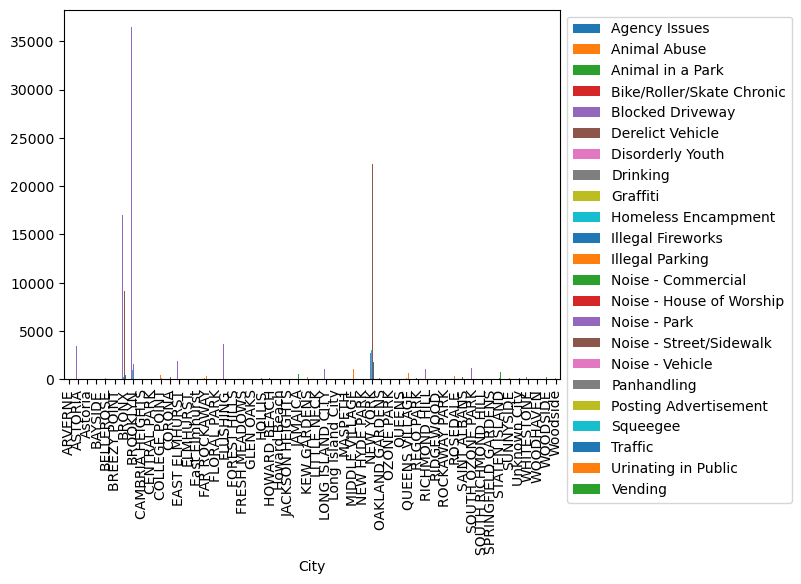

In [62]:
complaints_by_city_and_type = data.groupby(['City', 'Complaint_Type']).size().unstack(fill_value=0)
complaints_by_city_and_type.plot.bar()
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### 4.2 Sort the complaint types based on the average Request_Closing_Time grouping them for different locations

In [63]:
data['Request_Closing_Time'] = data['elapsed'] / 3600
complaints_by_type_and_location = data.groupby(['Complaint_Type', 'City'])['Request_Closing_Time'].mean().reset_index()
sorted_complaints = complaints_by_type_and_location.sort_values(by='Request_Closing_Time')
print(sorted_complaints)

                Complaint_Type                 City  Request_Closing_Time
213                   Drinking              ARVERNE              0.238611
666      Posting Advertisement            RIDGEWOOD              0.248611
54   Bike/Roller/Skate Chronic        EAST ELMHURST              0.252222
338          Illegal Fireworks           OZONE PARK              0.330833
739        Urinating in Public               QUEENS              0.340556
..                         ...                  ...                   ...
307        Homeless Encampment      OAKLAND GARDENS             28.654444
70   Bike/Roller/Skate Chronic  SOUTH RICHMOND HILL             30.910278
286        Homeless Encampment            BELLEROSE             39.147222
273                   Graffiti       QUEENS VILLAGE             53.331944
49            Animal in a Park               QUEENS            336.842778

[792 rows x 3 columns]


### See whether the average response time across different complaint types is similar (overall)

In [64]:
overall_average_response_time = data['Request_Closing_Time'].mean()

average_response_time_by_complaint = data.groupby('Complaint_Type')['Request_Closing_Time'].mean()

print("Overall Average Response Time: {:.2f} hours".format(overall_average_response_time))
print("\nAverage Response Time by Complaint Type:")
print(average_response_time_by_complaint)


Overall Average Response Time: 4.20 hours

Average Response Time by Complaint Type:
Complaint_Type
Agency Issues                  5.080312
Animal Abuse                   5.009043
Animal in a Park             336.842778
Bike/Roller/Skate Chronic      3.645469
Blocked Driveway               4.509034
Derelict Vehicle               7.044333
Disorderly Youth               3.434375
Drinking                       3.839250
Graffiti                       6.465651
Homeless Encampment            4.292051
Illegal Fireworks              2.809301
Illegal Parking                4.347343
Noise - Commercial             3.079378
Noise - House of Worship       3.164191
Noise - Park                   3.396127
Noise - Street/Sidewalk        3.397582
Noise - Vehicle                3.489389
Panhandling                    4.403764
Posting Advertisement          2.023960
Squeegee                       4.044514
Traffic                        3.419200
Urinating in Public            3.599804
Vending              

### 5.1Visualize the average of Request_Closing_Time

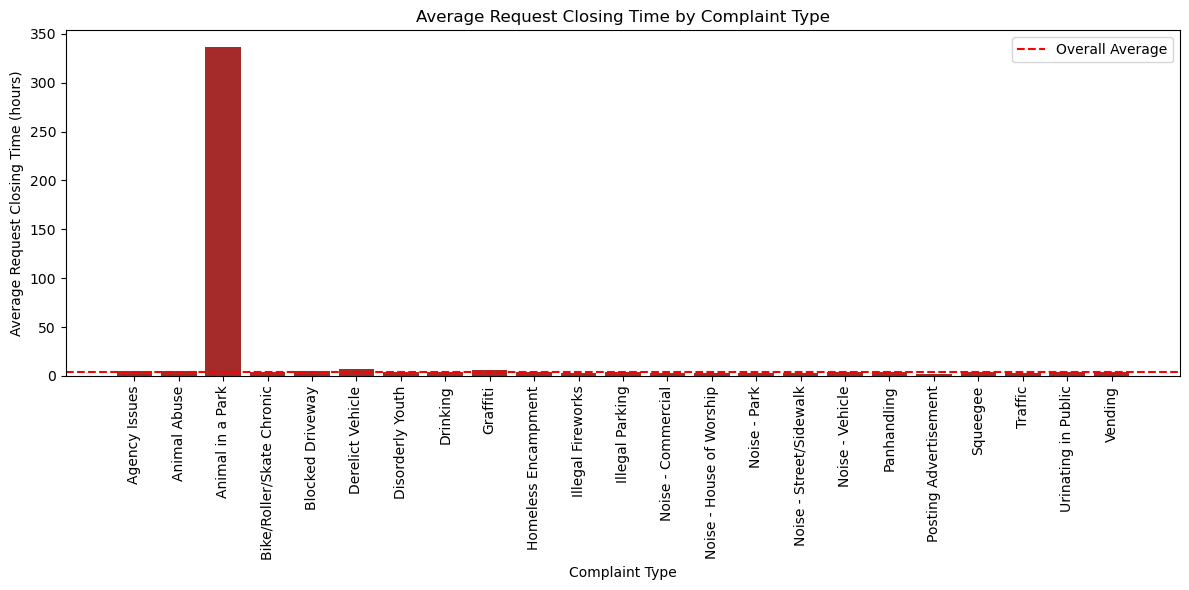

In [65]:
overall_average_response_time = data['Request_Closing_Time'].mean()

average_response_time_by_complaint = data.groupby('Complaint_Type')['Request_Closing_Time'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.bar(average_response_time_by_complaint['Complaint_Type'], average_response_time_by_complaint['Request_Closing_Time'], color='brown')
plt.axhline(y=overall_average_response_time, color='red', linestyle='--', label='Overall Average')
plt.xlabel('Complaint Type')
plt.ylabel('Average Request Closing Time (hours)')
plt.title('Average Request Closing Time by Complaint Type')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## 6.Identify the significant variables by performing statistical analysis using p-values

To identify significant variables through statistical analysis using p-values, we can perform a statistical test such as the Analysis of Variance (ANOVA) or t-test, depending on the type of data and the specific analysis you are interested in. The p-value will help determine whether the variation observed in a specific variable is statistically significant or just due to random chance. This test is suitable when you have multiple groups (e.g., complaint types) and want to assess whether there are statistically significant differences in a continuous variable (e.g., Request_Closing_Time) across those groups.

Assumptions for ANOVA:

The samples are independent. The data is approximately normally distributed within each group. Homogeneity of variances (equal variance) among the groups.

In [66]:
import scipy.stats as stats


# Perform one-way ANOVA to identify significant variables
# Here, 'Complaint Type' is the categorical variable and 'Request_Closing_Time' is the continuous variable
anova_result = stats.f_oneway(*[group['Request_Closing_Time'] for name, group in data.groupby('Complaint_Type')])

# Get the p-value from the ANOVA result
p_value = anova_result.pvalue

# Print the p-value
print("P-value:", p_value)

# Check if the p-value is significant (typically < 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference among the complaint types.")
else:
    print("There is no statistically significant difference among the complaint types.")


P-value: 0.0
There is a statistically significant difference among the complaint types.


## 7. Perform a Kruskal-WallisH test

If the assumptions for performing the one-way ANOVA are not met (i.e., the data is not normally distributed or the variance is not equal among the groups), the Kruskal-Wallis test can be used as a non-parametric alternative. The Kruskal-Wallis test is suitable for analyzing continuous variables across multiple groups (complaint types) when the data is non-normally distributed.

In [67]:
import scipy.stats as stats


# Perform one-way ANOVA to identify significant variables
# Here, 'Complaint Type' is the categorical variable and 'Request_Closing_Time' is the continuous variable
anova_result = stats.f_oneway(*[group['Request_Closing_Time'] for name, group in data.groupby('Complaint_Type')])

# Get the p-value from the ANOVA result
p_value = anova_result.pvalue

# Print the p-value
print("P-value:", p_value)

# Check if the p-value is significant (typically < 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference among the complaint types.")
else:
    print("There is no statistically significant difference among the complaint types.")


P-value: 0.0
There is a statistically significant difference among the complaint types.


#### 7.1Fail to reject H0: All sample distributions are equal

 if the p-value obtained from the Kruskal-Wallis test (or any statistical test) is greater than or equal to the chosen significance level (e.g., 0.05), we fail to reject the null hypothesis (H0). In this context, the null hypothesis states that the sample distributions (in this case, the Request_Closing_Time for each complaint type) are equal, meaning there is no statistically significant difference among the groups (complaint types).

Thus, if the p-value is not statistically significant (greater than 0.05), we do not have enough evidence to claim that the Request_Closing_Time is significantly different across different complaint types. In other words, we cannot reject the possibility that the Request_Closing_Time is the same for all complaint types based on the available data.

#### 7.2Reject H0: One or more sample distributions are not equal

If the p-value obtained from the Kruskal-Wallis test (or any statistical test) is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis (H0). In the context of the Kruskal-Wallis test, rejecting the null hypothesis means that there is sufficient evidence to suggest that at least one of the sample distributions (in this case, the Request_Closing_Time for at least one complaint type) is statistically significantly different from the others.

In simpler terms, if the p-value is statistically significant (less than 0.05), we can conclude that there is a statistically significant difference in Request_Closing_Time among different complaint types. We can then proceed with further post-hoc tests or additional analyses to identify which complaint types are significantly different from each other.